# data_cleansing_tutorial
Data cleansing tutorial in Pandas for Chipy scientific SIG

## Data Import and Verification

In [1]:
import pandas as pd

### Years 04-05

In [2]:
df04 = pd.read_csv('../data/immunization_04-05.csv')
df04.head()

,Immunization School Survey Report 2004-05,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,RCDT,Region,District,School,Total Sch. Enroll.,Total - NC,Unduplic.,Total Excluded,NC-PE Only,Polio Prot.,...,Cpox Prot.,Cpox Rel.,Cpox Med.,Cpox AS,Cpox UP/NC,Cpox Total,NaN,NaN,NaN,NaN
1,Adams County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01001001026,01,0010,0001,279,2,2,2,0,277,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,01001002026,01,0020,2002,278,1,1,1,0,276,...,138,0,0,1,1,140,NaN,NaN,NaN,NaN
4,01001002026,01,0020,2002,419,0,0,0,0,419,...,161,0,0,0,0,161,NaN,NaN,NaN,NaN


Here we see that the header information is wrong. The correct header is row 0. Because we are lazy, we will re-import the data and drop the first row instead of formatting this current version.

In [3]:
df04 = pd.read_csv('../data/immunization_04-05.csv', skiprows=1)
df04.head()

,RCDT,Region,District,School,Total Sch. Enroll.,Total - NC,Unduplic.,Total Excluded,NC-PE Only,Polio Prot.,...,Cpox Prot.,Cpox Rel.,Cpox Med.,Cpox AS,Cpox UP/NC,Cpox Total,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,Adams County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01001001026,1,0010,0001,279,2,2,2,0,277,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,01001002026,1,0020,2002,278,1,1,1,0,276,...,138,0,0,1,1,140,NaN,NaN,NaN,NaN
3,01001002026,1,0020,2002,419,0,0,0,0,419,...,161,0,0,0,0,161,NaN,NaN,NaN,NaN
4,01001002X06,1,002X,n/a,197,0,0,0,0,193,...,101,2,0,0,0,103,NaN,NaN,NaN,NaN


Cool, the columns are correct but per our goals we only need the columns for Polio. Let's remove the rest.

In [4]:
columns_to_keep = ['RCDT', 'School', 'Total Sch. Enroll.', 'Polio Prot.']
df04 = df04.ix[:, columns_to_keep] # takes all rows, only the columns in the array columns_to_keep
df04.head()

,RCDT,School,Total Sch. Enroll.,Polio Prot.
0,Adams County,NaN,NaN,NaN
1,01001001026,0001,279,277
2,01001002026,2002,278,276
3,01001002026,2002,419,419
4,01001002X06,n/a,197,193


Interesting, the first row has NaN. Looking back at the table above, this is because the original table has some extra rows for Counties e.g. "Adams County".

Let's simply drop the NaNs in this table.

In [5]:
df04.dropna(inplace=True) # inplace=True replaces the previous data frame.
                          # This is the same as df04 = df04.dropna(inplace=False)
df04.head()

,RCDT,School,Total Sch. Enroll.,Polio Prot.
1,01001001026,0001,279,277
2,01001002026,2002,278,276
3,01001002026,2002,419,419
4,01001002X06,n/a,197,193
5,01001003026,1001,330,329


Instead of looking just the first 5 rows, let's check out some summary statistics.

#### Summary Statistics

In [6]:
df04.describe()

,RCDT,School,Total Sch. Enroll.,Polio Prot.
count,5179,5179,5179,5179
unique,2045,701,1237,1240
top,15016299025,n/a,231,127
freq,594,1165,19,16


In [7]:
df04.dtypes

RCDT                  object
School                object
Total Sch. Enroll.    object
Polio Prot.           object
dtype: object

Uh oh, the two columns are supposed to be numerical, not strings (denoted here as objects).

Let's convert these now.

In [8]:
# inplace isn't available for this function, thus asign manually
cols = ['Total Sch. Enroll.', 'Polio Prot.']
df04[cols] = df04[cols].applymap(lambda x: int(x))
df04.head()

ValueError: ("invalid literal for int() with base 10: '1,628'", u'occurred at index Total Sch. Enroll.')

This error shows that there's are values with commas, so Python can't automatically change it into an int.

We have to remove the comma, then convert to int.

In [9]:
df04[cols] = df04[cols].applymap(lambda x: int(x.replace(',', '')))
df04.head()

,RCDT,School,Total Sch. Enroll.,Polio Prot.
1,01001001026,0001,279,277
2,01001002026,2002,278,276
3,01001002026,2002,419,419
4,01001002X06,n/a,197,193
5,01001003026,1001,330,329


In [10]:
df04.dtypes

RCDT                  object
School                object
Total Sch. Enroll.     int64
Polio Prot.            int64
dtype: object

Beautiful. Now let's run those summary stats again.

In [11]:
df04.describe(include='all')

,RCDT,School,Total Sch. Enroll.,Polio Prot.
count,5179,5179,5179.000000,5179.000000
unique,2045,701,NaN,NaN
top,15016299025,n/a,NaN,NaN
freq,594,1165,NaN,NaN
mean,NaN,NaN,454.953659,450.193281
std,NaN,NaN,459.038458,455.747560
min,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,191.000000,189.000000
50%,NaN,NaN,344.000000,341.000000
75%,NaN,NaN,561.000000,554.500000


This looks fine so far.

We can probably do the same things to the next datasets.

### Years 09-10

In [12]:
df09 = pd.read_csv('../data/immunization_09-10.csv')
df09.head()

,2009-2010 School Year Immunization Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,RCDTS,Facility,RCDT,School,Enrollment,TotalNC,UnduplCount,NCPE,Excluded,PolioProt,...,HibMedObj,HibRelObj,HibApprSchd,HibTotal,CpoxProt,CpoxNcNp,CpoxMedObj,CpoxRelObj,CpoxApprSchd,CpoxTotal
1,140161630022008,21st Century Preparatory Center,14016163002,2008,234,3,3,0,3,232,...,0,0,0,54,233,0,1,0,0,234
2,540921180243104,2x2 Christian Educational Center,54092118024,3104,19,19,19,0,0,0,...,0,0,0,19,0,19,0,0,0,19
3,140162180160007,A B Shepard High Sch (Campus),14016218016,0007,1944,3,2,1,3,1942,...,0,0,0,0,0,0,0,0,0,0
4,041012050252059,A C Thompson Elem School,04101205025,2059,307,1,0,1,0,307,...,0,0,0,0,307,0,0,0,0,307


Same header issue as before.

In [13]:
df09 = pd.read_csv('../data/immunization_09-10.csv', skiprows=1)
df09.head()

,RCDTS,Facility,RCDT,School,Enrollment,TotalNC,UnduplCount,NCPE,Excluded,PolioProt,...,HibMedObj,HibRelObj,HibApprSchd,HibTotal,CpoxProt,CpoxNcNp,CpoxMedObj,CpoxRelObj,CpoxApprSchd,CpoxTotal
0,140161630022008,21st Century Preparatory Center,14016163002,2008,234,3,3,0,3,232,...,0,0,0,54,233,0,1,0,0,234
1,540921180243104,2x2 Christian Educational Center,54092118024,3104,19,19,19,0,0,0,...,0,0,0,19,0,19,0,0,0,19
2,140162180160007,A B Shepard High Sch (Campus),14016218016,0007,1944,3,2,1,3,1942,...,0,0,0,0,0,0,0,0,0,0
3,041012050252059,A C Thompson Elem School,04101205025,2059,307,1,0,1,0,307,...,0,0,0,0,307,0,0,0,0,307
4,140160960022001,A F Ames Elem School,14016096002,2001,334,1,0,1,0,330,...,0,0,0,0,330,0,0,4,0,334


In [14]:
df09.columns

Index([u'RCDTS', u'Facility', u'RCDT', u'School', u'Enrollment', u'TotalNC',
       u'UnduplCount', u'NCPE', u'Excluded', u'PolioProt', u'PolioNcNp',
       u'PolioMedObj', u'PolioRelObj', u'PolioApprSchd', u'PolioTotal',
       u'DtpProt', u'DtpNcNp', u'DtpMedObj', u'DtpRelObj', u'DtpApprSchd',
       u'DtpTotal', u'MeasProt', u'MeasNcNp', u'MeasMedObj', u'MeasRelObj',
       u'MeasApprSchd', u'MeasTotal', u'RubProt', u'RubNcNp', u'RubMedObj',
       u'RubRelObj', u'RubApprSchd', u'RubTotal', u'MumpProt', u'MumpNcNp',
       u'MumpMedObj', u'MumpRelObj', u'MumpApprSchd', u'MumpTotal', u'HepProt',
       u'HepNcNp', u'HepMedObj', u'HepRelObj', u'HepApprSchd', u'HepTotal',
       u'HibProt', u'HibNcNp', u'HibMedObj', u'HibRelObj', u'HibApprSchd',
       u'HibTotal', u'CpoxProt', u'CpoxNcNp', u'CpoxMedObj', u'CpoxRelObj',
       u'CpoxApprSchd', u'CpoxTotal'],
      dtype='object')

In [15]:
columns_to_keep = ['RCDTS', 'Enrollment', 'PolioProt']
df09 = df09[columns_to_keep]
df09.dropna(inplace=True)
df09.head()

,RCDTS,Enrollment,PolioProt
0,140161630022008,234,232
1,540921180243104,19,0
2,140162180160007,1944,1942
3,041012050252059,307,307
4,140160960022001,334,330


In [16]:
df09.dtypes

RCDTS          object
Enrollment    float64
PolioProt     float64
dtype: object

How nice, they're floats already.

In [17]:
df09.describe(include='all')

,RCDTS,Enrollment,PolioProt
count,5021,5021.000000,5021.000000
unique,5021,NaN,NaN
top,280065050160001,NaN,NaN
freq,1,NaN,NaN
mean,NaN,460.148576,453.327026
std,NaN,469.334927,465.449582
min,NaN,2.000000,0.000000
25%,NaN,199.000000,195.000000
50%,NaN,353.000000,348.000000
75%,NaN,549.000000,540.000000


Looks fine too.

Let's go to the final dataset.

### Years 14-15

In [18]:
df14 = pd.read_csv('../data/Immunization_14-15.csv')
df14.head()

,Immunization Status of School-Age Children in Illinois for School Year 2014-2015,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Region-County-District-Type-School (RCDTS),District,Facility,NaN,NaN,NaN,NaN,NaN,Polio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Enrollment PreK-12,Unduplicated Count Non-compliant-Immunization...,Non-compliant with Physical Exam Only,Total Excluded,School Compliance %,Protected and in compliance,Religious objection,Medical reasons,Approved schedule,McKinney Vento Act,Unprotected and in noncompliance,Vaccination Acquired,No Vaccination,Protection %
2,010010010260001,Payson CUSD 1,Seymour High School,211,0,0,0,100.00%,211,0,0,0,0,0,211,0,100.00%
3,010010010262002,Payson CUSD 1,Seymour Elementary School,314,0,1,0,99.68%,314,0,0,0,0,0,314,0,100.00%
4,010010020260001,Liberty CUSD 2,Liberty High School,295,0,0,0,100.00%,295,0,0,0,0,0,295,0,100.00%


There are header issues again, but this seems different. Looks like we want RCDTS from row 0, and the rest from column 1.

Instead of what we did before, let's modify this by manually taking the raw data we want, then renaming the columns.

In [19]:
new_column_names = ['RCDTS', 'Enrolled', 'Protected']
df14 = df14.ix[2:, [0, 3, 8]]
df14.dropna(inplace=True)
df14.columns = new_column_names
df14.head()

,RCDTS,Enrolled,Protected
2,010010010260001,211,211
3,010010010262002,314,314
4,010010020260001,295,295
5,010010020262002,356,355
6,01001002X060000,120,100


So far so good. Lets run the summary stats again.

In [20]:
df14.describe()

,RCDTS,Enrolled,Protected
count,4874,4874,4874
unique,4874,1194,1177
top,310450460222009,301,165
freq,1,17,16


In [21]:
df14.dtypes

RCDTS        object
Enrolled     object
Protected    object
dtype: object

Objects again...

In [22]:
cols = ['Enrolled', 'Protected']
df14[cols] = df14[cols].applymap(lambda x: int(x.replace(',', '')))
df14.head()

,RCDTS,Enrolled,Protected
2,010010010260001,211,211
3,010010010262002,314,314
4,010010020260001,295,295
5,010010020262002,356,355
6,01001002X060000,120,100


In [23]:
df14.describe(include='all')

,RCDTS,Enrolled,Protected
count,4874,4874.000000,4874.000000
unique,4874,NaN,NaN
top,310450460222009,NaN,NaN
freq,1,NaN,NaN
mean,NaN,916.929011,901.335248
std,NaN,32004.421755,31460.188023
min,NaN,1.000000,0.000000
25%,NaN,200.000000,197.000000
50%,NaN,359.000000,351.000000
75%,NaN,546.750000,536.750000


That max looks crazy. What RCDTS does it belong to?

In [24]:
df14.sort_values(by ='Enrolled', ascending=False).head()

,RCDTS,Enrolled,Protected
4876,Total,2234556,2196554
1542,15016299025006C,10127,10044
1614,15016299025201C,8338,8100
1625,15016299025205C,7901,7774
3471,340490600260022,4308,4205


That's not a valid RCDTS... Looks like we can just dump the row with id=4876.

In [25]:
df14 = df14.drop(4876, axis=0)

In [26]:
df14.describe(include='all')

,RCDTS,Enrolled,Protected
count,4873,4873.000000,4873.000000
unique,4873,NaN,NaN
top,310450460222009,NaN,NaN
freq,1,NaN,NaN
mean,NaN,458.558588,450.760107
std,NaN,488.745116,483.684059
min,NaN,1.000000,0.000000
25%,NaN,200.000000,197.000000
50%,NaN,359.000000,351.000000
75%,NaN,546.000000,536.000000


Much better.

And that should be the last fix for our data import.

## Data Concatenation

Next we will concatenate the tables to create a single table that will contain all the necessary data for our analysis.

First thing we notice from above is that all of the tables have different columns. This will have to be fixed first.

Tables for 14-15 and 09-10 both only have 3 columns so let's merge those first.

However, to keep track of where the data comes from, let's add a "Year" column to both. Then we'll rename then concat.

In [27]:
# add year column with correct values
df14['Year'] = 2014
df09['Year'] = 2009

print df09.head()
print df14.head()

             RCDTS  Enrollment  PolioProt  Year
0  140161630022008         234        232  2009
1  540921180243104          19          0  2009
2  140162180160007        1944       1942  2009
3  041012050252059         307        307  2009
4  140160960022001         334        330  2009
             RCDTS  Enrolled  Protected  Year
2  010010010260001       211        211  2014
3  010010010262002       314        314  2014
4  010010020260001       295        295  2014
5  010010020262002       356        355  2014
6  01001002X060000       120        100  2014


In [28]:
# rename columns
columns = ['rcdts', 'enrollment', 'protected', 'year']
df09.columns = columns
df14.columns = columns

In [29]:
# concatenate
df = pd.concat([df14, df09])
print df[:5] # print first 5, same functionally as head()
print df[-5:] # print last 5

             rcdts  enrollment  protected  year
2  010010010260001         211        211  2014
3  010010010262002         314        314  2014
4  010010020260001         295        295  2014
5  010010020262002         356        355  2014
6  01001002X060000         120        100  2014
                rcdts  enrollment  protected  year
5016  40056002X060000         117        105  2009
5017  41057030X060000         319        312  2009
5018  44063015X060000         344        343  2009
5019  56099028X060000         124        119  2009
5020  340491260170001        2640       2609  2009


Great, looks like both our datasets are here then.

Time to join the table from year 04-05.

However, we remember that year 04-05 has 4 columns because school is broken out:

In [30]:
df04.head()

,RCDT,School,Total Sch. Enroll.,Polio Prot.
1,01001001026,0001,279,277
2,01001002026,2002,278,276
3,01001002026,2002,419,419
4,01001002X06,n/a,197,193
5,01001003026,1001,330,329


Another thing we notice is that the years 04-05 have 'n/a' values for School... this poses a problem for future analyses. Without being sure of the School values, we're not comfortable comparing this year with the other 2 years.

After much debate, we decided to remove school completely from our current analysis.

Unfortunately, this means we will have to remove the School values from our other datasets.

In [31]:
df.insert(1, 'rcdt', 0)
df['rcdt'] = df['rcdts'].apply(lambda x: x[:-4])
df.head()

,rcdts,rcdt,enrollment,protected,year
2,010010010260001,01001001026,211,211,2014
3,010010010262002,01001001026,314,314,2014
4,010010020260001,01001002026,295,295,2014
5,010010020262002,01001002026,356,355,2014
6,01001002X060000,01001002X06,120,100,2014


In [32]:
# drop old rcdts column
df.drop('rcdts', axis=1, inplace=True)
df.head()

,rcdt,enrollment,protected,year
2,01001001026,211,211,2014
3,01001001026,314,314,2014
4,01001002026,295,295,2014
5,01001002026,356,355,2014
6,01001002X06,120,100,2014


Now with the master dataset prepped, let's clean up the 04-05 dataset.

In [33]:
columns = ['rcdt', 'enrollment', 'protected', 'year']

In [34]:
df04.drop('School', axis=1, inplace=True)
df04['year'] = 2004
df04.columns = columns
df04.head()

,rcdt,enrollment,protected,year
1,01001001026,279,277,2004
2,01001002026,278,276,2004
3,01001002026,419,419,2004
4,01001002X06,197,193,2004
5,01001003026,330,329,2004


Finally, let's merge this dataset into the master dataset.

In [35]:
df = pd.concat([df, df04])
print df[:5] # print first 5, same functionally as head()
print df[-5:] # print last 5

          rcdt  enrollment  protected  year
2  01001001026         211        211  2014
3  01001001026         314        314  2014
4  01001002026         295        295  2014
5  01001002026         356        355  2014
6  01001002X06         120        100  2014
             rcdt  enrollment  protected  year
5481  43102140026         484        478  2004
5482  43102140026         406        389  2004
5483  43102140026         103        103  2004
5484  43102140026          80         78  2004
5485  43102140026         515        504  2004


## Optional: Data Analysis

The original goal of this analysis is to see if the protected percentage dropped over the years. Let's run this analysis, which shouldn't take long now that we have the data in the way we want it.

In [36]:
df_year = df.groupby('year').aggregate({'enrollment':'sum', 'protected':'sum'})
df_year.head()

,enrollment,protected
year,,
2004,2356205,2331551
2009,2310406,2276155
2014,2234556,2196554


In [37]:
df_year['prot_perc'] = df_year['protected']/df_year['enrollment']
df_year.head()

,enrollment,protected,prot_perc
year,,,
2004,2356205,2331551,0.989537
2009,2310406,2276155,0.985175
2014,2234556,2196554,0.982993


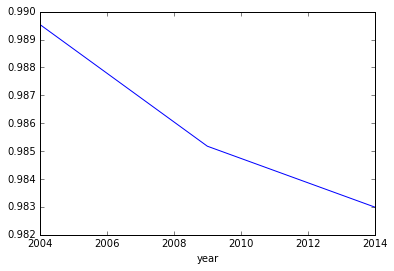

In [38]:
%matplotlib inline
df_year.prot_perc.plot()

Looks like the rate of immunization has dropped a little over these years. However, with only 3 data points we can't be too certain. Best if we were to take the other years in between into account. That's for another time though.